# Convolutional neural networks for image classification

This notebook provides examples of CNNs for image classification. We will do the following excercises:
- Handwritten digit recognition with fully connected network
- Handwritten digit recognition with convolutional neural network
- Classify images of clothing with convolutional neural network


# Exercise 1: Fully connected network for handwritten digit recognition

## Step 1: Load libraries

In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras import optimizers
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print(tf.__version__) 

2.4.1


## Step 2: Load dataset

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9.

In [3]:
# first, we load a dataset of handwritten digits. The dataset consists of greyscale images. If you want to try RGB digit try this dataset: https://www.kaggle.com/prasunroy/synthetic-digits 
mnist = keras.datasets.mnist

In [4]:
# Here, we download images (x) and labels (y)
# 60000 training set; 10000 test set
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Step 2.1: Explore the data

2


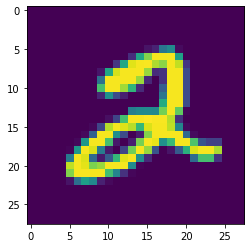

In [5]:
# Example of a picture
index = 5
plt.imshow(x_train[index])
print(y_train[index])

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [6]:
### Normalise images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0].shape

(28, 28)

## Step3: Build the model

We will use Keras sequential class: see documentation  [here](https://keras.io/api/models/ )

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

The Sequential model is a simple list of layers, but is limited to single-input, single-output stacks of layers. 

In [9]:
model = keras.models.Sequential([keras.layers.Flatten(), 
                                keras.layers.Dense(128, activation=tf.nn.relu),
                                keras.layers.Dense(10, activation=tf.nn.softmax)])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.


We will use Adam optimization algorithm. Adam is a stochastic gradient descent method that computes individual adaptive learning rates for different parameters from estimates of first- and second-order moments of the gradients. [Read more here](https://www.tensorflow.org/swift/api_docs/Classes/Adam).

Reference: [“Adam: A Method for Stochastic Optimization”](https://arxiv.org/pdf/1412.6980v8.pdf) (Kingma and Ba, 2014).

In [10]:
model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 4: Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.



### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [11]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4194 - accuracy: 0.8808
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1225 - accuracy: 0.9633
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0798 - accuracy: 0.9764
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0590 - accuracy: 0.9821
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9867
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0315 - accuracy: 0.9906
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0262 - accuracy: 0.9927
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0207 - accuracy: 0.9938
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0169 - accuracy: 0.9949
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## Step 5: Evaluate model performance

Next, compare how the model performs on the test dataset:

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 995us/step - loss: 0.1001 - accuracy: 0.9785

Test accuracy: 0.9785000085830688


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [13]:
classifications = model.predict(x_test)

print(classifications[2])

[1.0236822e-11 9.9999130e-01 4.0465494e-07 1.4536178e-10 1.5195907e-07
 1.6794928e-09 5.8631633e-07 8.2570821e-08 7.4122458e-06 2.6301316e-12]


In [14]:
print(y_test[2])

1


# Plot the training history

dict_keys(['loss', 'accuracy'])


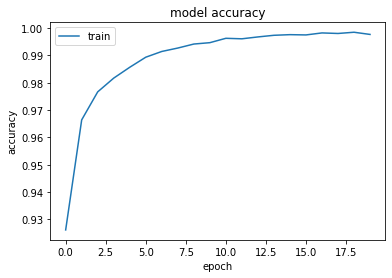

In [15]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

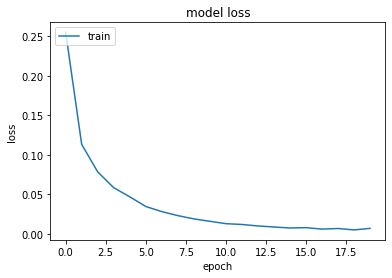

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exercise 2: simple CNN for handwritten digit recognition

Now we will start with building the model: we will use the same data we have downloaded before. 

We will only slightly reshape the data to be able to implement a CNN.

In [17]:
x_train = x_train.reshape(60000, 28,28,1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28,28,1)
x_test = x_test / 255.0

## Step3: Build the CNN model

In [18]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [19]:
# first, let's check that we are happy with the model architecture
# this model will be slightly different from the one from the lecture slides
# can you spot the difference both in notation and architecture?

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [20]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 4: Train the model

In [21]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 1.9472 - accuracy: 0.2605
Epoch 2/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.4363 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2809 - accuracy: 0.9142
Epoch 4/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2273 - accuracy: 0.9299
Epoch 5/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1998 - accuracy: 0.9378
Epoch 6/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1752 - accuracy: 0.9459
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1607 - accuracy: 0.9492
Epoch 8/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1492 - accuracy: 0.9555
Epoch 9/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1380 - accuracy: 0.9577
Epoch 10/10
1875/1875 [==============================] - 74s 39m

## Step 5: Evaluate model performance

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.1347 - accuracy: 0.9565


[0.13472524285316467, 0.9564999938011169]

In [23]:
classifications = model.predict(x_test)

print(classifications[1])

[7.7780032e-06 2.4713068e-05 9.9989581e-01 4.2849904e-05 6.1131689e-10
 6.7368777e-09 1.7297082e-09 3.4226787e-08 2.8780823e-05 7.0273121e-09]


In [24]:
print(y_test[3])

0


## Plot the training history

dict_keys(['loss', 'accuracy'])


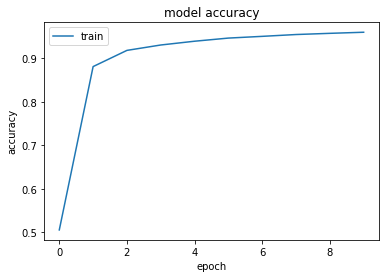

In [25]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

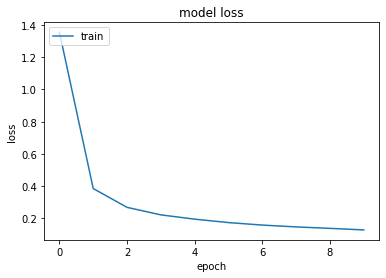

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exercise 3: simple CNN for clothing classification

In this excercise, we will train a neural network model to classify images of clothing, like sneakers and shirts. 

## Step 2: download the data

We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

As before, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. We import and load the Fashion MNIST data directly from TensorFlow:

In [27]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Step 2.1. Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

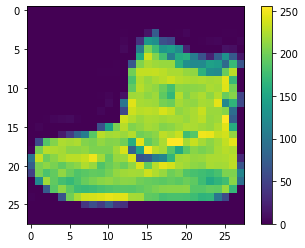

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
# again, we are going to normalize images
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

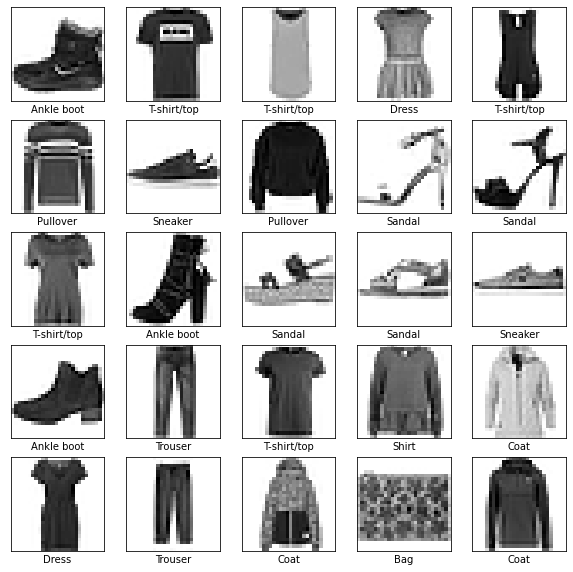

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Step 3: Build the model

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Step 4: Train the model

In [34]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6329 - accuracy: 0.7827
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8595
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3422 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2903 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2814 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2694 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2457 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3539 - accuracy: 0.8760

Test accuracy: 0.8759999871253967


### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [36]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [37]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [38]:
predictions[0]

array([6.4882109e-08, 1.1948574e-09, 5.4533005e-09, 1.5298587e-09,
       3.5873884e-09, 9.4146229e-04, 6.1518572e-09, 7.2150077e-03,
       7.5066100e-07, 9.9184275e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [39]:
test_labels[0]

9

We will plot this to  to look at the full set of 10 class predictions.

In [40]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

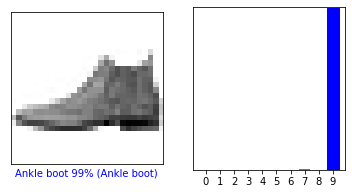

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

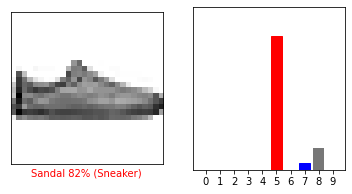

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

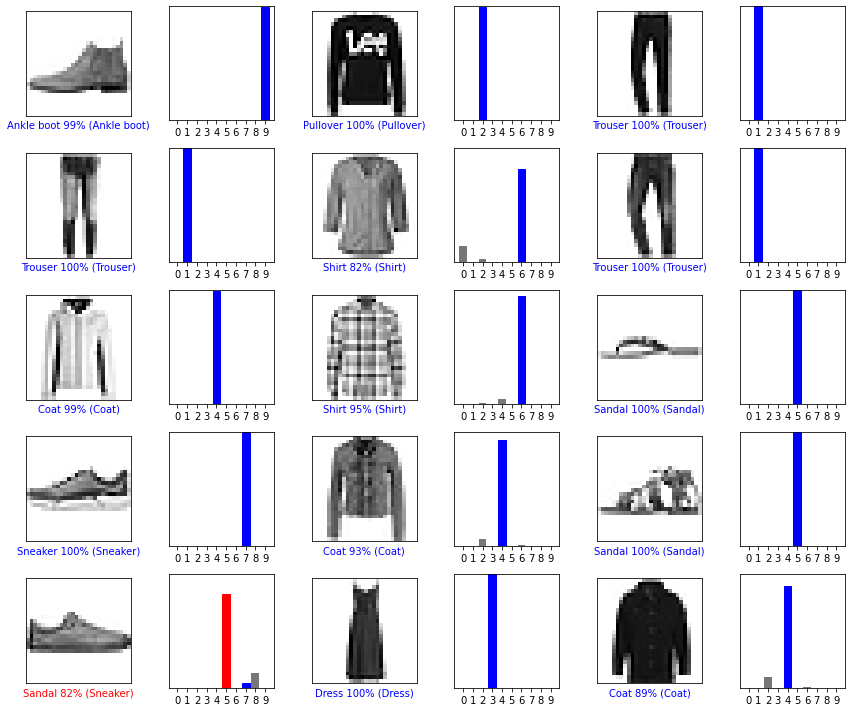

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [44]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [46]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.3406169e-04 1.6459185e-11 9.9631578e-01 6.7755140e-10 2.1753288e-03
  4.4215285e-09 9.7485428e-04 2.0467040e-14 3.2908811e-09 2.4985862e-12]]


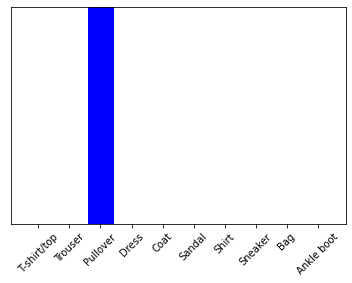

In [47]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [48]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.